In [1]:
import pandas as pd

# Sample data points for food inflation in Norway
data = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Inflation Rate': [2.5, 2.8, 3.0, 2.3, 2.1, 2.8, 3.2, 4.0, 4.5, 5.0, 5.30]  # Example rates
}

df = pd.DataFrame(data)


In [2]:
# Calculate average inflation rate over the period
average_inflation = df['Inflation Rate'].mean()

print(f"Average food inflation rate from 2015 to 2025: {average_inflation}%")


Average food inflation rate from 2015 to 2025: 3.409090909090909%


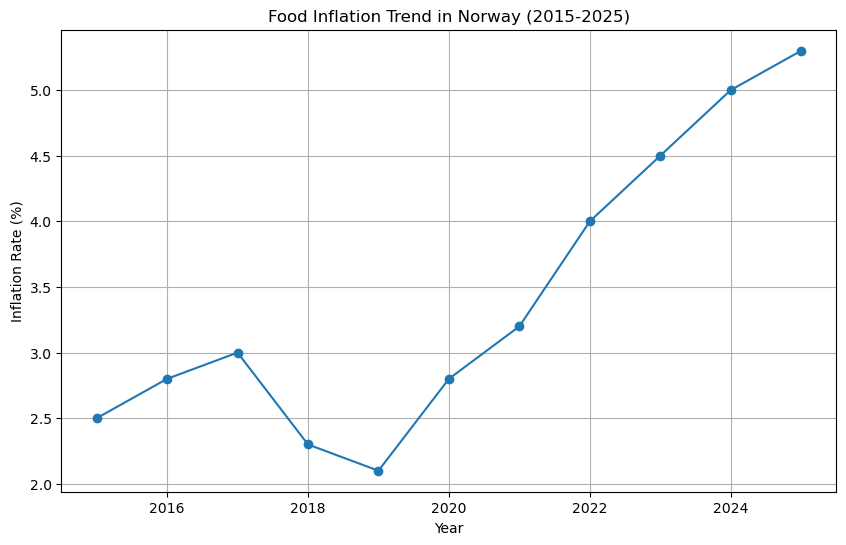

In [3]:
import matplotlib.pyplot as plt

# Plot the inflation trend
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Inflation Rate'], marker='o')
plt.title('Food Inflation Trend in Norway (2015-2025)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()


In [4]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Norway Food Inflation Dashboard'),
    dcc.Graph(id='inflation-graph'),
    dcc.Dropdown(
        id='time-frame-dropdown',
        options=[
            {'label': 'Full Period', 'value': 'all'},
            {'label': '2015–2020', 'value': '2015-2020'},
            {'label': '2021–2025', 'value': '2021-2025'}
        ],
        value='all'
    )
])

@app.callback(
    Output('inflation-graph', 'figure'),
    Input('time-frame-dropdown', 'value')
)
def update_graph(time_frame):
    if time_frame == 'all':
        filtered_df = df
    elif time_frame == '2015-2020':
        filtered_df = df[df['Year'] <= 2020]
    elif time_frame == '2021-2025':
        filtered_df = df[df['Year'] >= 2021]
    
    fig = px.line(filtered_df, x='Year', y='Inflation Rate',
                  title='Food Inflation Trend in Norway',
                  markers=True)
    fig.update_layout(xaxis_title='Year', yaxis_title='Inflation Rate (%)')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [6]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Data
data = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Inflation Rate': [2.5, 2.8, 3.0, 2.3, 2.1, 2.8, 3.2, 4.0, 4.5, 5.0, 5.3]
}
df = pd.DataFrame(data)
avg = df['Inflation Rate'].mean()

# Dash app
app = dash.Dash(__name__)
app.title = "Food Inflation Dashboard"

# Layout
app.layout = html.Div(id='main-div', children=[
    html.Div([
        html.H1(id='title', style={'textAlign': 'center'}),
        html.Div([
            html.Label("🌐 Language / Språk:"),
            dcc.Dropdown(
                id='language-dropdown',
                options=[
                    {'label': 'English 🇬🇧', 'value': 'en'},
                    {'label': 'Norsk 🇳🇴', 'value': 'no'}
                ],
                value='en',
                clearable=False,
                style={'width': '200px'}
            ),
        ], style={'textAlign': 'center', 'marginBottom': '10px'}),

        html.Div([
            html.Label("🌓 Theme:"),
            dcc.RadioItems(
                id='theme-switch',
                options=[
                    {'label': 'Light 🌞', 'value': 'light'},
                    {'label': 'Dark 🌙', 'value': 'dark'}
                ],
                value='light',
                labelStyle={'display': 'inline-block', 'margin': '0 10px'}
            )
        ], style={'textAlign': 'center', 'marginBottom': '20px'}),
        
        html.Div(id='average-text', style={'fontSize': '20px', 'textAlign': 'center', 'marginBottom': '10px'}),
        dcc.Dropdown(
            id='time-frame-dropdown',
            options=[
                {'label': 'Full Period', 'value': 'all'},
                {'label': '2015–2020', 'value': '2015-2020'},
                {'label': '2021–2025', 'value': '2021-2025'}
            ],
            value='all',
            style={'width': '50%', 'margin': 'auto', 'marginBottom': '20px'}
        ),
        dcc.Graph(id='inflation-graph')
    ])
])

# Callbacks
@app.callback(
    Output('title', 'children'),
    Output('average-text', 'children'),
    Output('inflation-graph', 'figure'),
    Output('main-div', 'style'),
    Input('language-dropdown', 'value'),
    Input('time-frame-dropdown', 'value'),
    Input('theme-switch', 'value')
)
def update_dashboard(language, timeframe, theme):
    # Filter data
    if timeframe == 'all':
        filtered_df = df
    elif timeframe == '2015-2020':
        filtered_df = df[df['Year'] <= 2020]
    else:
        filtered_df = df[df['Year'] >= 2021]

    # Translations
    if language == 'en':
        title = '🇳🇴 Norway Food Inflation Dashboard'
        avg_text = f"📊 Average food inflation (2015–2025): {avg:.2f}%"
        x_title = 'Year'
        y_title = 'Inflation Rate (%)'
    else:
        title = '🇳🇴 Matvarepris-inflasjon i Norge'
        avg_text = f"📊 Gjennomsnittlig matvareinflasjon (2015–2025): {avg:.2f}%"
        x_title = 'År'
        y_title = 'Inflasjonsrate (%)'

    # Theme settings
    if theme == 'dark':
        bg_color = '#1e1e1e'
        text_color = 'white'
        plot_template = 'plotly_dark'
    else:
        bg_color = 'white'
        text_color = 'black'
        plot_template = 'plotly_white'

    fig = px.line(filtered_df, x='Year', y='Inflation Rate',
                  markers=True, template=plot_template)
    fig.update_layout(
        title=title,
        xaxis_title=x_title,
        yaxis_title=y_title,
        font_color=text_color,
        plot_bgcolor=bg_color,
        paper_bgcolor=bg_color
    )

    main_div_style = {'backgroundColor': bg_color, 'color': text_color, 'padding': '20px'}
    return title, avg_text, fig, main_div_style

if __name__ == '__main__':
    app.run_server(debug=True)
